# 🛠️ Preparação dos Dados

In [11]:
import pandas as pd

dados = pd.read_json('/content/dados_tratados.json')

#Retirar colunas desnecessárias: customerID;
dados = dados.drop(columns = ['customerID', 'Charges.Daily'])
dados.head(10)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,False,Female,False,True,True,9,True,False,DSL,False,True,False,True,True,False,One year,True,Mailed check,65.60,593.30
1,False,Male,False,False,False,9,True,True,DSL,False,False,False,False,False,True,Month-to-month,False,Mailed check,59.90,542.40
2,True,Male,False,False,False,4,True,False,Fiber optic,False,False,True,False,False,False,Month-to-month,True,Electronic check,73.90,280.85
3,True,Male,True,True,False,13,True,False,Fiber optic,False,True,True,False,True,True,Month-to-month,True,Electronic check,98.00,1237.85
4,True,Female,True,True,False,3,True,False,Fiber optic,False,False,False,True,True,False,Month-to-month,True,Mailed check,83.90,267.40
5,False,Female,False,False,True,9,True,False,DSL,False,False,False,True,True,True,Month-to-month,True,Credit card (automatic),69.40,571.45
6,False,Female,True,True,False,71,True,False,Fiber optic,True,True,True,True,True,True,Two year,True,Bank transfer (automatic),109.70,7904.25
7,False,Male,False,True,False,63,True,True,Fiber optic,True,False,False,True,False,False,Two year,True,Credit card (automatic),84.65,5377.80
8,False,Female,True,False,False,7,True,False,DSL,True,False,False,False,False,False,Month-to-month,True,Electronic check,48.20,340.35
9,False,Female,False,True,True,65,True,True,DSL,True,True,True,True,True,True,Two year,True,Mailed check,90.45,5957.90


In [12]:
import numpy as np
# Mudar todos os tipos bools para int64
dados['Churn'] = dados['Churn'].astype(np.int64)
dados['SeniorCitizen'] = dados['SeniorCitizen'].astype(np.int64)
dados['Partner'] = dados['Partner'].astype(np.int64)
dados['Dependents'] = dados['Dependents'].astype(np.int64)
dados['PhoneService'] = dados['PhoneService'].astype(np.int64)
dados['MultipleLines'] = dados['MultipleLines'].astype(np.int64)
dados['OnlineBackup'] = dados['OnlineBackup'].astype(np.int64)
dados['OnlineSecurity'] = dados['OnlineSecurity'].astype(np.int64)
dados['DeviceProtection'] = dados['DeviceProtection'].astype(np.int64)
dados['TechSupport'] = dados['TechSupport'].astype(np.int64)
dados['StreamingTV'] = dados['StreamingTV'].astype(np.int64)
dados['StreamingMovies'] = dados['StreamingMovies'].astype(np.int64)
dados['PaperlessBilling'] = dados['PaperlessBilling'].astype(np.int64)

dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   int64  
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   int64  
 4   Dependents        7267 non-null   int64  
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   int64  
 7   MultipleLines     7267 non-null   int64  
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   int64  
 10  OnlineBackup      7267 non-null   int64  
 11  DeviceProtection  7267 non-null   int64  
 12  TechSupport       7267 non-null   int64  
 13  StreamingTV       7267 non-null   int64  
 14  StreamingMovies   7267 non-null   int64  
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   int64  
 17  

In [13]:
dados['Charges.Total'] = dados['Charges.Total'].fillna(0)
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   int64  
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   int64  
 4   Dependents        7267 non-null   int64  
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   int64  
 7   MultipleLines     7267 non-null   int64  
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   int64  
 10  OnlineBackup      7267 non-null   int64  
 11  DeviceProtection  7267 non-null   int64  
 12  TechSupport       7267 non-null   int64  
 13  StreamingTV       7267 non-null   int64  
 14  StreamingMovies   7267 non-null   int64  
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   int64  
 17  

In [14]:
variaveis_categoricas = ['gender', 'InternetService', 'Contract', 'PaymentMethod']
dados = pd.get_dummies(dados, columns=variaveis_categoricas, dtype= int)
dados = dados.drop(columns = 'gender_Male')
dados.columns

Index(['Churn', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'Charges.Monthly', 'Charges.Total', 'gender_Female',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [24]:
num_churn = dados['Churn'].value_counts()
proporcao_churn = dados['Churn'].value_counts(normalize=True)

df_churn = pd.DataFrame({
    "contagem": num_churn,
    "proporcao": proporcao_churn
})

df_churn

,contagem,proporcao
Churn,,
0,5398,0.74281
1,1869,0.25719


Conclusão: existe um desequilíbrio entre as classes — a maioria dos clientes permanece ativa, enquanto ~25% evadiram.
Esse nível de desbalanceamento pode impactar modelos preditivos, pois alguns algoritmos tendem a favorecer a classe majoritária.

# 🎯 Correlação e Seleção de Variáveis

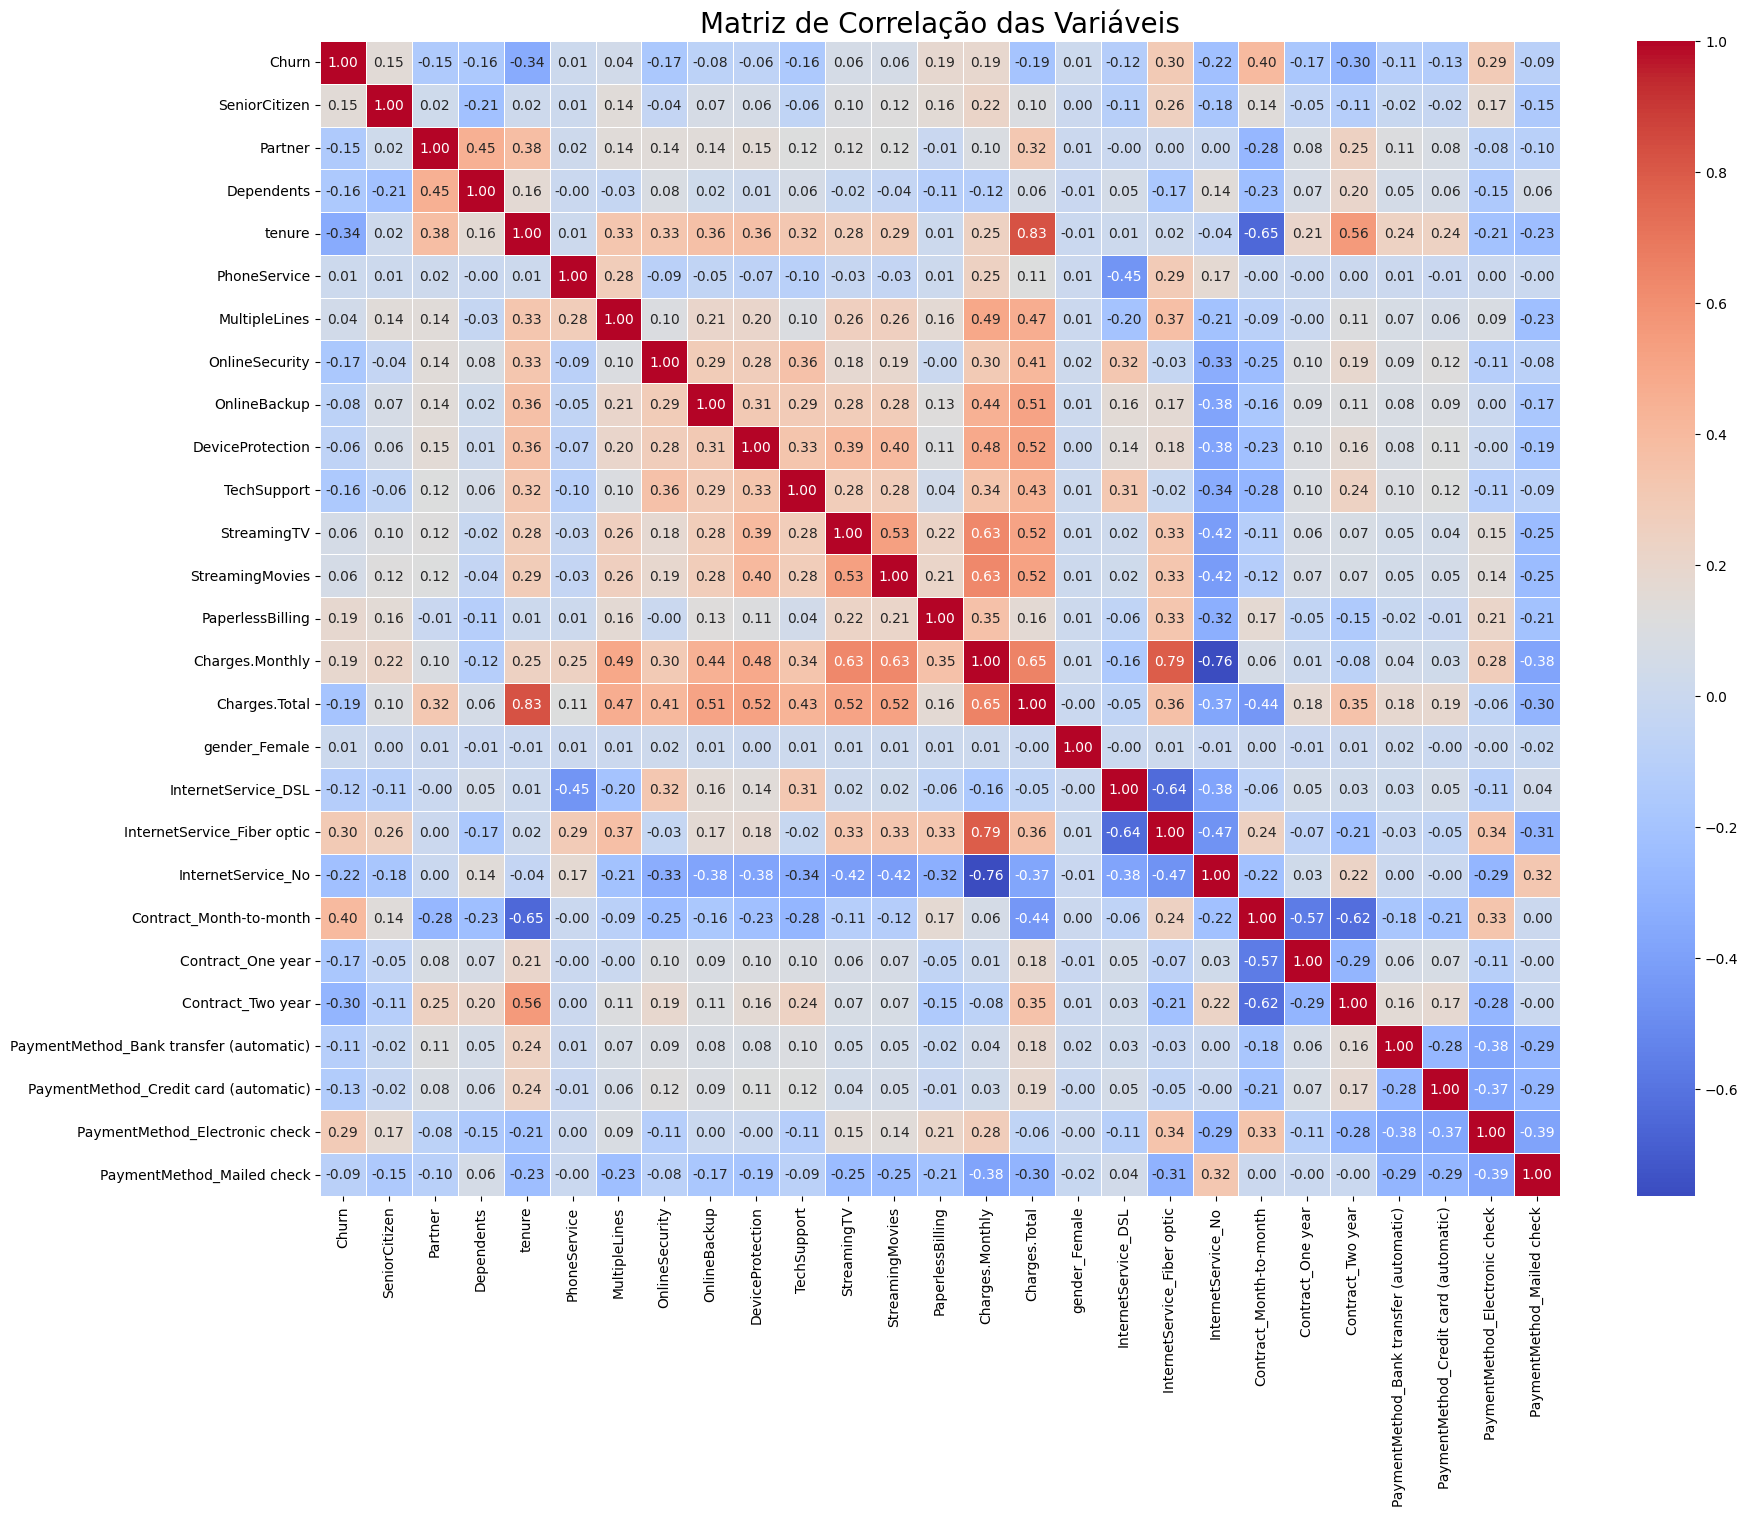

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

matriz_correlacao = dados.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis', fontsize=20)
plt.show()


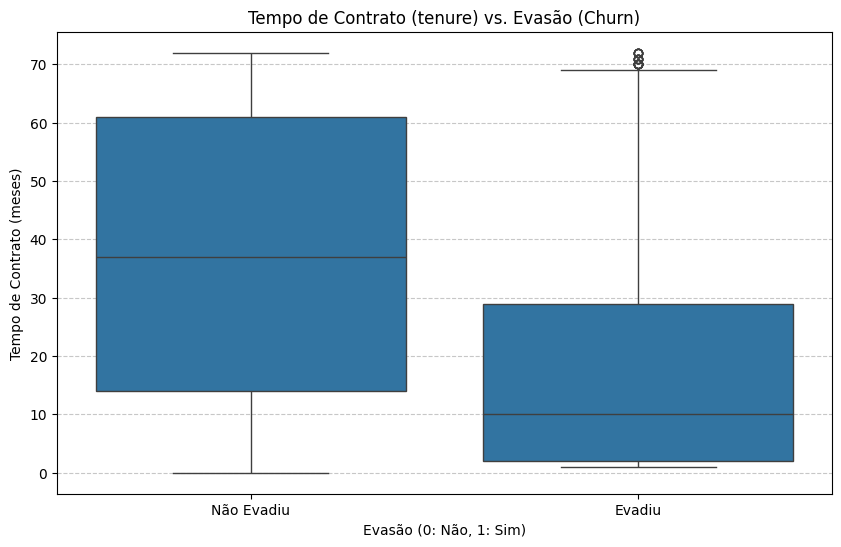

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=dados)
plt.title('Tempo de Contrato (tenure) vs. Evasão (Churn)')
plt.xlabel('Evasão (0: Não, 1: Sim)')
plt.ylabel('Tempo de Contrato (meses)')
plt.xticks([0, 1], ['Não Evadiu', 'Evadiu'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

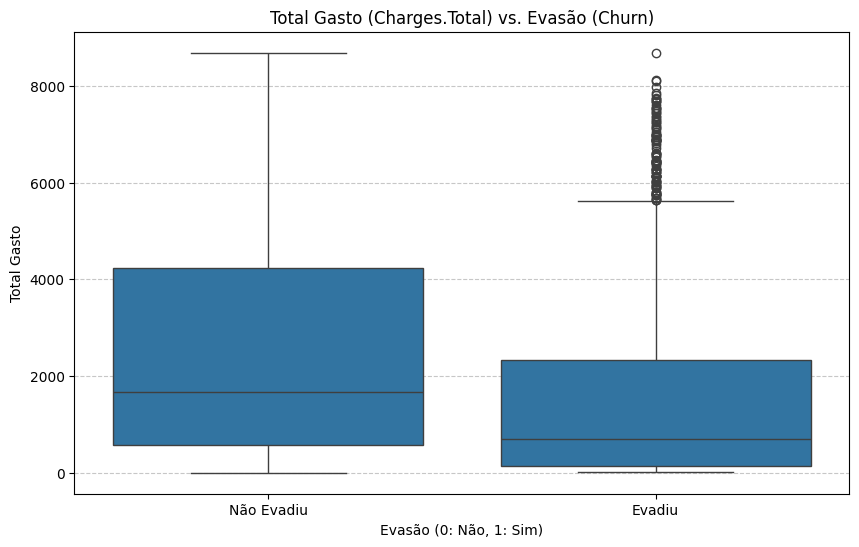

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Charges.Total', data=dados)
plt.title('Total Gasto (Charges.Total) vs. Evasão (Churn)')
plt.xlabel('Evasão (0: Não, 1: Sim)')
plt.ylabel('Total Gasto')
plt.xticks([0, 1], ['Não Evadiu', 'Evadiu'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

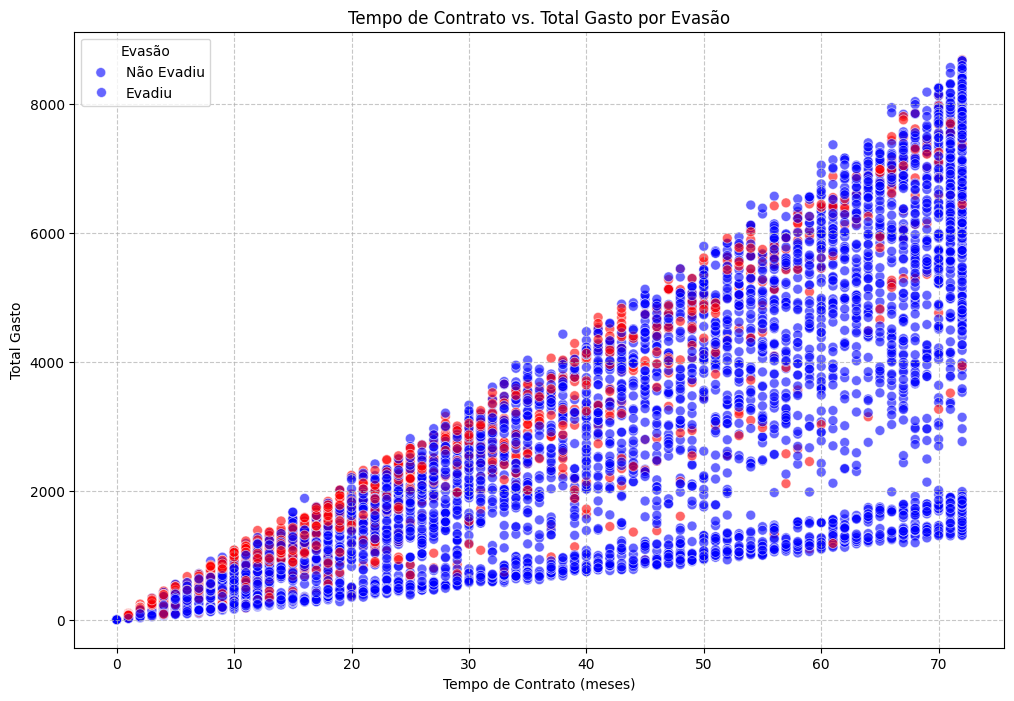

In [29]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='tenure', y='Charges.Total', hue='Churn', data=dados, alpha=0.6,
                palette={0: 'blue', 1: 'red'},  # Cores para Churn 0 e 1
                s=50) # Tamanho dos pontos
plt.title('Tempo de Contrato vs. Total Gasto por Evasão')
plt.xlabel('Tempo de Contrato (meses)')
plt.ylabel('Total Gasto')
plt.legend(title='Evasão', labels=['Não Evadiu', 'Evadiu'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 🤖 Modelagem Preditiva

In [32]:
from sklearn.model_selection import train_test_split

X = dados.drop('Churn', axis=1)
y = dados['Churn']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.05, random_state=42)


In [35]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier()
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier()

Árvore de Decisão: A Árvore de Decisão é um modelo de aprendizado de máquina que pode ser utilizado para prever a evasão de clientes. Este modelo é uma técnica de aprendizado de máquina que pode ser utilizada para problemas de classificação binária. A escolha da Árvore de Decisão se deve ao fato de que este modelo é uma técnica de aprendizado de máquina que pode ser utilizada para problemas de classificação binária.

In [40]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(y_teste, modelo.predict(X_teste))
print("Acurácia:", acuracia)

Acurácia: 0.771978021978022


In [46]:
from sklearn.metrics import precision_score

precisao = precision_score(y_teste, modelo.predict(X_teste))
print("Precisão:", precisao)

Precisão: 0.49019607843137253


In [45]:
from sklearn.metrics import recall_score

recall = recall_score(y_teste, modelo.predict(X_teste))
print("Recall:", recall)

Recall: 0.6172839506172839


In [44]:
from sklearn.metrics import f1_score

f1 = f1_score(y_teste, modelo.predict(X_teste))
print("F1-score da Árvore de Decisão:", f1)

F1-score da Árvore de Decisão: 0.546448087431694


In [49]:
from sklearn.metrics import confusion_matrix


matriz = confusion_matrix(y_teste, modelo.predict(X_teste))
print("Matriz de Confusão:", matriz)

Matriz de Confusão: [[231  52]
 [ 31  50]]


**-Qual modelo teve o melhor desempenho?**
O modelo com o melhor desempenho é o que tem a maior acurácia, precisão, recall e F1-score.



# 📋  Interpretação e Conclusões

In [53]:
from sklearn.linear_model import LogisticRegression
modelo_logistico = LogisticRegression(max_iter=1000)
modelo_logistico.fit(X_treino, y_treino)
coeficientes = modelo_logistico.coef_[0]
variaveis = X.columns
coef_df = pd.DataFrame({'Variável': variaveis, 'Coeficiente': coeficientes})
coef_df['Importância (exp(Coeficiente))'] = np.exp(coef_df['Coeficiente'])
coef_df = coef_df.sort_values(by='Importância (exp(Coeficiente))', ascending=False)
display(coef_df)

,Variável,Coeficiente,Importância (exp(Coeficiente))
14,Charges.Total,0.669594,1.953443
19,Contract_Month-to-month,0.296370,1.344967
17,InternetService_Fiber optic,0.280271,1.323489
12,PaperlessBilling,0.169530,1.184748
13,Charges.Monthly,0.126092,1.134387
5,MultipleLines,0.104062,1.109669
24,PaymentMethod_Electronic check,0.101546,1.106881
0,SeniorCitizen,0.082337,1.085821
10,StreamingTV,0.081397,1.084801
11,StreamingMovies,0.074904,1.077780


In [59]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_treino, y_treino)
importancia_rf = rf_model.feature_importances_
importancia_df = pd.DataFrame({'Variável': X.columns, 'Importância': importancia_rf})
importancia_df = importancia_df.sort_values(by='Importância', ascending=False)

print("Importância das variáveis no Random Forest:")
print(importancia_df)


Importância das variáveis no Random Forest:
                                   Variável  Importância
14                            Charges.Total     0.188787
13                          Charges.Monthly     0.177186
3                                    tenure     0.156892
19                  Contract_Month-to-month     0.064247
17              InternetService_Fiber optic     0.038437
15                            gender_Female     0.028413
24           PaymentMethod_Electronic check     0.027348
12                         PaperlessBilling     0.025651
1                                   Partner     0.023273
6                            OnlineSecurity     0.021422
0                             SeniorCitizen     0.021341
7                              OnlineBackup     0.020538
9                               TechSupport     0.020503
21                        Contract_Two year     0.019186
8                          DeviceProtection     0.019126
5                             MultipleLines 

In [60]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_treino, y_treino)
coeficientes_svm = svm_model.coef_[0]
variaveis_svm = X.columns
coef_svm_df = pd.DataFrame({'Variável': variaveis_svm, 'Coeficiente': coeficientes_svm})
coef_svm_df['Importância'] = np.abs(coef_svm_df['Coeficiente'])
coef_svm_df = coef_svm_df.sort_values(by='Importância', ascending=False)

print("Coeficientes da SVM:")
print(coef_svm_df)


Coeficientes da SVM:
                                   Variável  Coeficiente  Importância
14                            Charges.Total    -0.484408     0.484408
17              InternetService_Fiber optic     0.428879     0.428879
3                                    tenure    -0.331683     0.331683
18                       InternetService_No    -0.289607     0.289607
16                      InternetService_DSL    -0.196701     0.196701
9                               TechSupport    -0.121213     0.121213
11                          StreamingMovies     0.116013     0.116013
5                             MultipleLines     0.113151     0.113151
10                              StreamingTV     0.112652     0.112652
6                            OnlineSecurity    -0.100123     0.100123
12                         PaperlessBilling     0.088236     0.088236
24           PaymentMethod_Electronic check     0.081848     0.081848
4                              PhoneService    -0.073537     0.073537

# Conclusão

A evasão de clientes na empresa de telecomunicações é influenciada por uma combinação de fatores de serviço, tempo de relacionamento e forma de pagamento. O modelo de classificação utilizado identificou que a taxa de evasão (Churn) representa aproximadamente 25,7% dos clientes na base de dados. O desempenho do modelo demonstra uma capacidade robusta de identificar padrões de comportamento que levam à saída de clientes, o que permite direcionar as estratégias de retenção de forma mais eficaz.

Os principais fatores que impactam a evasão são:
* **Contrato Mensal (`Contract_Month-to-month`)**: Clientes com este tipo de contrato têm a maior probabilidade de evasão.
* **Tempo de permanência (`tenure`)**: Clientes com menos tempo de casa são mais propensos a sair.
* **Serviço de Internet (`InternetService_Fiber optic`)**: O uso de fibra óptica também está fortemente associado ao aumento da evasão.
* **Serviços de Segurança (`OnlineSecurity`) e Suporte Técnico (`TechSupport`)**: A ausência desses serviços aumenta a propensão à evasão.
* **Fatura Sem Papel (`PaperlessBilling`)**: Esta variável também apresenta uma influência significativa na probabilidade de evasão.
* **Método de Pagamento (`PaymentMethod_Electronic check`)**: A escolha do cheque eletrônico como forma de pagamento também aumenta o risco de Churn.
* **Encargos Mensais (`Charges.Monthly`)**: Aumento nos encargos mensais também é um fator relevante.

Com base nos resultados, as estratégias de retenção devem se focar em:
* **Incentivar Contratos de Longo Prazo**: Oferecer descontos e benefícios exclusivos para clientes que migrarem de contratos mensais para anuais ou de dois anos.
* **Promover Serviços de Valor Agregado**: Campanha para a contratação dos serviços de segurança online e suporte técnico, demonstrando o valor desses adicionais na experiência do cliente.
* **Revisar Planos de Fibra Óptica**: Investigar a qualidade do serviço de fibra óptica e, se necessário, oferecer melhorias ou compensações para clientes insatisfeitos.
* **Otimizar Processos de Pagamento**: Criar incentivos para a utilização de métodos de pagamento automático, como transferência bancária e cartão de crédito, que se mostraram associados a menor evasão.
* **Revisão de Preços**: Analisar os planos de maior valor mensal e buscar a criação de ofertas mais competitivas ou pacotes de serviço que justifiquem os custos mais altos.
* **Ações Direcionadas a Novos Clientes**: Desenvolver um programa de onboarding robusto para os clientes novos, focando em satisfação inicial e construção de relacionamento a longo prazo.